<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/DATASET-Tr%C3%A8s-Large/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

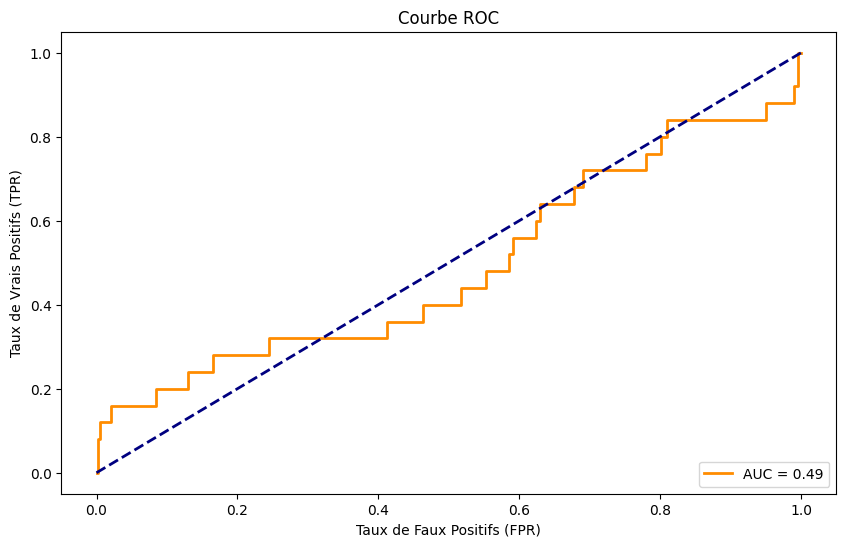

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Cette ligne est utilisée pour sélectionner uniquement les colonnes spécifiées
# dans la liste selected_columns à partir du DataFrame data.
# Cela permet de filtrer le DataFrame initial et de conserver uniquement les colonnes
# jugées pertinentes pour l'analyse ou la modélisation.
data = data[selected_columns]

# La ligne de code data.dropna(inplace=True) est utilisée pour supprimer les lignes contenant
# des valeurs manquantes (NaN) du DataFrame data. Cette opération est réalisée de manière inplace,
# ce qui signifie que le DataFrame original est modifié directement, plutôt que de créer une copie modifiée.
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X) et de la variable cible (y)
# Prépare mes données pour l'entraînement d'un modèle
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données permet de d'assurer que chaque caractéristiques contribuent de manière équitable au modèle.
# Normaliser des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un modèle de régression Lasso
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Essayez différentes valeurs d'alpha
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle avec le meilleur alpha
best_lasso_model = grid_search.best_estimator_


# Prédictions sur l'ensemble de test
y_pred = best_lasso_model.predict(X_test_scaled)

# Affichage de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()
